In [80]:
def get_data(path):
    with open(path, 'r') as file:
        data = [json.loads(line) for line in file]
    return data

# First ones

In [81]:
def get_accuracy(arr):
    count = 0
    correct = 0
    for ans in arr:
        if ans['answer'] == ans['gold_ans_char']:
            correct += 1
        count += 1
    return (correct / count) * 100

In [82]:
llama_8b_first = get_data("first_ones/llama3.1_8b-instruct/zero-shot_chat_first_v0/500_hard_all.jsonl")
llama_70b_first = get_data("first_ones/llama3.3_70b-instruct/zero-shot_chat_first_v0/500_hard_all.jsonl")
olmo_7b_first = get_data("first_ones/OLMo_7B-instruct/zero-shot_chat_first_v0/500_hard_all.jsonl")                    

In [83]:
llama_8b_first[0]

{'input': 'w1r1r1i1r1r1r1i1r1r1i1r1i0i1i0r1i1r1i0r1r1r1i0i1i0r1i0r1r1r1i1r1r1r1i1i0i0i0i0r1i1r1r1r1r1r1i1i0r1r1r1r1i0i0i1i1r1r1i0i1r1r1r1i0r1i0r1i0i1i0r1i1r1r1i1r1i1r1r1i0r1i0r1i0r1r1r1i0i0i0i0i0i0i0r1i1i0r1r1r1i0r1r1r1r1r1r1i1i0r1r1i1r1r1i0i1i0i0i0i0i1i1r1r1r1r1i0i0r1r1i0r1i1r1i1r1r1r1i0i1i0i1i0i1r1i0r1r1i1r1i1r1i0i0i1i1i1i0r1i0r1r1i1r1r1r1i0i1r1i0r1r1i0r1r1r1r1r1i1r1r1r1i1r1i0i1r1i1r1r1i0i0i1r1i1i0i1i1i1i0i1r1i0i0i1i1r1r1i1r1r1r1r1i0i1i0r1r1i1r1r1i1r1i0i0r1i1i1r1i0r1i0r1r1r1i1r1i0r1r1i0i0r1i0r1i1i1i1w1r1',
 'filename': 'datasets/flipflop/distance/s1/flipflop_500_w496.txt',
 'answer': 'w',
 'gold_ans_char': 'w',
 'full_answer': '<ans>w</ans>\n\nTo find the first character from the given "Input" string, I simply looked at the first character of the string, which is \'w\'.'}

In [84]:
llama_8b_acc_first = get_accuracy(llama_8b)
llama_70b_acc_first = get_accuracy(llama_70b)
olmo_7b_acc_first = get_accuracy(olmo_7b)

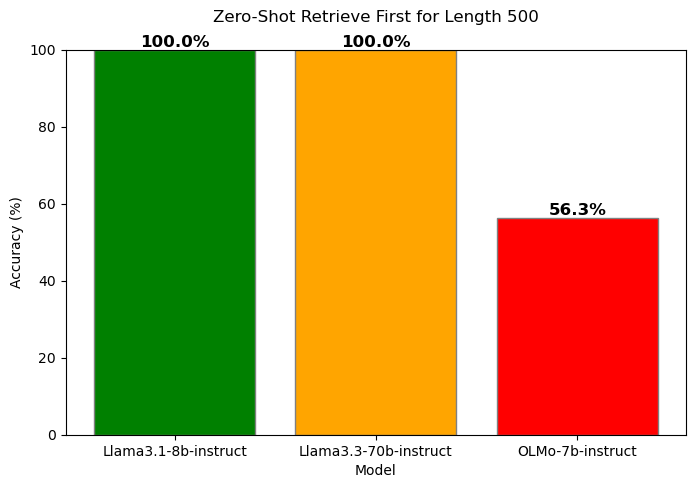

In [101]:
results = {
    'Llama3.1-8b-instruct': llama_8b_acc_first,
    'Llama3.3-70b-instruct': llama_70b_acc_first,
    'OLMo-7b-instruct': olmo_7b_acc_first
}
plt.figure(figsize=(8, 5))
bars = plt.bar(results.keys(), results.values(), color=['green', 'orange', 'red'], edgecolor='grey')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}%', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Zero-Shot Retrieve First for Length 500", pad=20)
plt.ylim(0, 100)
plt.show()


In [86]:
llama_8b_first_qa = get_data("first_ones/llama3.1_8b-instruct/qa_zero-shot_chat_first_v0/500_hard_all.jsonl")
llama_70b_first_qa = get_data("first_ones/llama3.3_70b-instruct/qa_zero-shot_chat_first_v0/500_hard_all.jsonl")
olmo_7b_first_qa = get_data("first_ones/OLMo_7B-instruct/qa_zero-shot_chat_first_v0/500_hard_all.jsonl") 

llama_8b_first_qa_acc = get_accuracy(llama_8b)
llama_70b_first_qa_acc = get_accuracy(llama_70b)
olmo_7b_first_qa_acc = get_accuracy(olmo_7b)

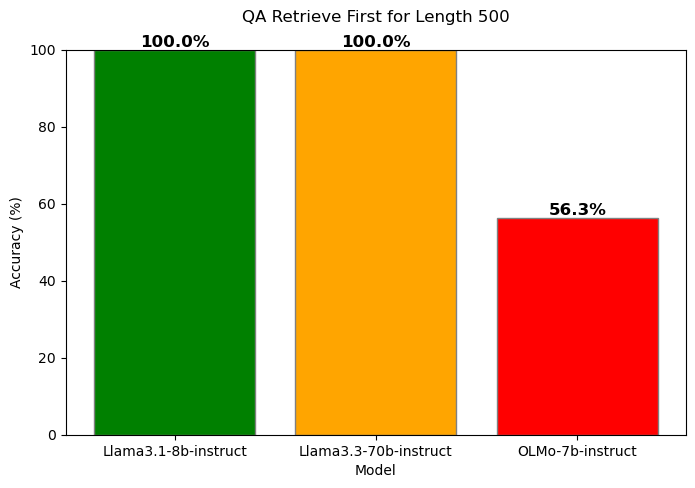

In [102]:
results = {
    'Llama3.1-8b-instruct': llama_8b_first_qa_acc,
    'Llama3.3-70b-instruct': llama_70b_first_qa_acc,
    'OLMo-7b-instruct': olmo_7b_first_qa_acc
}
plt.figure(figsize=(8, 5))
bars = plt.bar(results.keys(), results.values(), color=['green', 'orange', 'red'], edgecolor='grey')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}%', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("QA Retrieve First for Length 500", pad=20)
plt.ylim(0, 100)
plt.show()


# Last ones

In [88]:
llama_8b_last = get_data("last_ones/llama3.1_8b-instruct/zero-shot_chat_last_v0/500_hard_all.jsonl")
llama_70b_last = get_data("last_ones/llama3.3_70b-instruct/zero-shot_chat_last_v0/500_hard_all.jsonl")
olmo_7b_last = get_data("last_ones/OLMo_7B-instruct/zero-shot_chat_last_v0/500_hard_all.jsonl")   

llama_8b_last[0]

{'input': 'w1r1r1i1r1r1r1i1r1r1i1r1i0i1i0r1i1r1i0r1r1r1i0i1i0r1i0r1r1r1i1r1r1r1i1i0i0i0i0r1i1r1r1r1r1r1i1i0r1r1r1r1i0i0i1i1r1r1i0i1r1r1r1i0r1i0r1i0i1i0r1i1r1r1i1r1i1r1r1i0r1i0r1i0r1r1r1i0i0i0i0i0i0i0r1i1i0r1r1r1i0r1r1r1r1r1r1i1i0r1r1i1r1r1i0i1i0i0i0i0i1i1r1r1r1r1i0i0r1r1i0r1i1r1i1r1r1r1i0i1i0i1i0i1r1i0r1r1i1r1i1r1i0i0i1i1i1i0r1i0r1r1i1r1r1r1i0i1r1i0r1r1i0r1r1r1r1r1i1r1r1r1i1r1i0i1r1i1r1r1i0i0i1r1i1i0i1i1i1i0i1r1i0i0i1i1r1r1i1r1r1r1r1i0i1i0r1r1i1r1r1i1r1i0i0r1i1i1r1i0r1i0r1r1r1i1r1i0r1r1i0i0r1i0r1i1i1i1w1r1',
 'filename': 'datasets/flipflop/distance/s1/flipflop_500_w496.txt',
 'answer': 'w',
 'gold_ans_char': 'r',
 'full_answer': "<ans>w</ans>\n\nTo find the last character of the given string, I counted the characters from the end of the string. The string has 1000 characters, and the last character is 'w'."}

In [89]:
llama_8b_acc_last = get_accuracy(llama_8b_last)
llama_70b_acc_last = get_accuracy(llama_70b_last)
olmo_7b_acc_last = get_accuracy(olmo_7b_last)

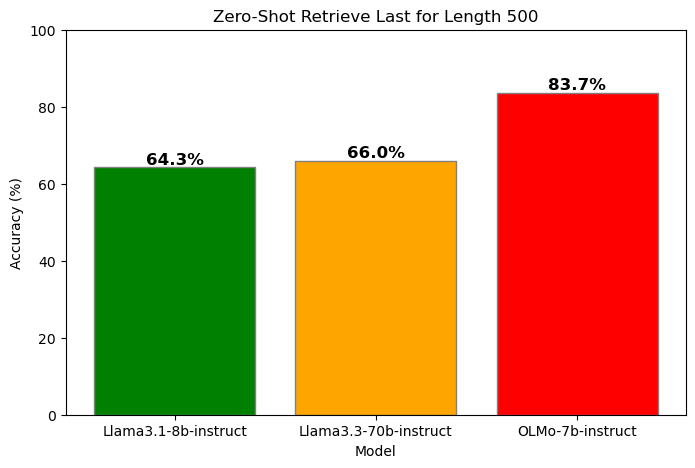

In [97]:
results = {
    'Llama3.1-8b-instruct': llama_8b_acc_last,
    'Llama3.3-70b-instruct': llama_70b_acc_last,
    'OLMo-7b-instruct': olmo_7b_acc_last
}

plt.figure(figsize=(8, 5))
bars = plt.bar(results.keys(), results.values(), color=['green', 'orange', 'red'], edgecolor='grey')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}%', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Zero-Shot Retrieve Last for Length 500")
plt.ylim(0, 100)
plt.show()


In [91]:
llama_8b_last_qa = get_data("last_ones/llama3.1_8b-instruct/qa_zero-shot_chat_last_v0/500_hard_all.jsonl")
llama_70b_last_qa = get_data("last_ones/llama3.3_70b-instruct/qa_zero-shot_chat_last_v0/500_hard_all.jsonl")
olmo_7b_last_qa = get_data("last_ones/OLMo_7B-instruct/qa_zero-shot_chat_last_v0/500_hard_all.jsonl")   


In [92]:
llama_8b_acc_last_qa = get_accuracy(llama_8b_last_qa)
llama_70b_acc_last_qa = get_accuracy(llama_70b_last_qa)
olmo_7b_acc_last_qa = get_accuracy(olmo_7b_last_qa)

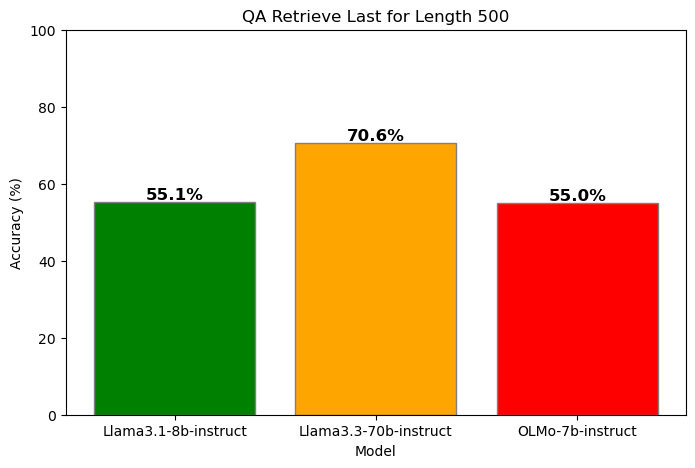

In [98]:
results = {
    'Llama3.1-8b-instruct': llama_8b_acc_last_qa,
    'Llama3.3-70b-instruct': llama_70b_acc_last_qa,
    'OLMo-7b-instruct': olmo_7b_acc_last_qa
}

plt.figure(figsize=(8, 5))
bars = plt.bar(results.keys(), results.values(), color=['green', 'orange', 'red'], edgecolor='grey')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}%', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("QA Retrieve Last for Length 500")
plt.ylim(0, 100)
plt.show()


# Induction Head

In [122]:
def flatten(xss):
    return [x for xs in xss for x in xs]

def get_ind_acc(arr):
    correct = 0
    for ans in arr:
        if str(ans['answer']) == str(ans['last_valid_token']):
            correct += 1
    return (correct / len(arr)) * 100

In [123]:
llama_8b_ind = flatten([
    get_data("flipflop/llama3.1_8B-instruct/distance/s1/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/distance/s2/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/distance/s3/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/distance/s4/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/distance/s5/flipflop_500_w496_results.jsonl")
])

llama_70b_ind = flatten([
    get_data("flipflop/llama3.3_70B-instruct/distance/s1/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/distance/s2/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/distance/s3/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/distance/s4/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/distance/s5/flipflop_500_w496_results.jsonl")
])

olmo_7b_ind = flatten([
    get_data("flipflop/OLMo_7b-instruct/distance/s1/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/distance/s2/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/distance/s3/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/distance/s4/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/distance/s5/flipflop_500_w496_results.jsonl")
])

In [124]:
llama_8b_ind[0]

{'id': 0,
 'prompt': 'w1r1r1i1r1r1r1i1r1r1i1r1i0i1i0r1i1r1i0r1r1r1i0i1i0r1i0r1r1r1i1r1r1r1i1i0i0i0i0r1i1r1r1r1r1r1i1i0r1r1r1r1i0i0i1i1r1r1i0i1r1r1r1i0r1i0r1i0i1i0r1i1r1r1i1r1i1r1r1i0r1i0r1i0r1r1r1i0i0i0i0i0i0i0r1i1i0r1r1r1i0r1r1r1r1r1r1i1i0r1r1i1r1r1i0i1i0i0i0i0i1i1r1r1r1r1i0i0r1r1i0r1i1r1i1r1r1r1i0i1i0i1i0i1r1i0r1r1i1r1i1r1i0i0i1i1i1i0r1i0r1r1i1r1r1r1i0i1r1i0r1r1i0r1r1r1r1r1i1r1r1r1i1r1i0i1r1i1r1r1i0i0i1r1i1i0i1i1i1i0i1r1i0i0i1i1r1r1i1r1r1r1r1i0i1i0r1r1i1r1r1i1r1i0i0r1i1i1r1i0r1i0r1r1r1i1r1i0r1r1i0i0r1i0r1i1i1i1w1r',
 'answer': '" + find_digit_after_w(input_str) + "',
 'flipflop': 'w1r1r1i1r1r1r1i1r1r1i1r1i0i1i0r1i1r1i0r1r1r1i0i1i0r1i0r1r1r1i1r1r1r1i1i0i0i0i0r1i1r1r1r1r1r1i1i0r1r1r1r1i0i0i1i1r1r1i0i1r1r1r1i0r1i0r1i0i1i0r1i1r1r1i1r1i1r1r1i0r1i0r1i0r1r1r1i0i0i0i0i0i0i0r1i1i0r1r1r1i0r1r1r1r1r1r1i1i0r1r1i1r1r1i0i1i0i0i0i0i1i1r1r1r1r1i0i0r1r1i0r1i1r1i1r1r1r1i0i1i0i1i0i1r1i0r1r1i1r1i1r1i0i0i1i1i1i0r1i0r1r1i1r1r1r1i0i1r1i0r1r1i0r1r1r1r1r1i1r1r1r1i1r1i0i1r1i1r1r1i0i0i1r1i1i0i1i1i1i0i1r1i0i0i1

In [125]:
llama_8b_acc_ind = get_ind_acc(llama_8b_ind)
llama_70b_acc_ind = get_ind_acc(llama_70b_ind)
olmo_7b_acc_ind = get_ind_acc(olmo_7b_ind)

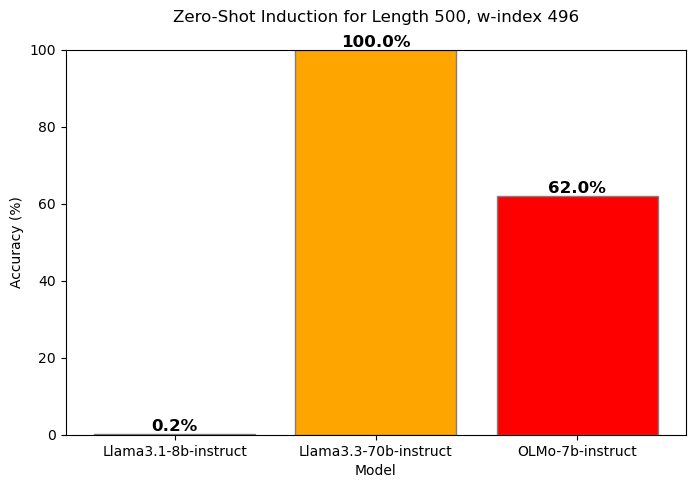

In [127]:
results = {
    'Llama3.1-8b-instruct': llama_8b_acc_ind,
    'Llama3.3-70b-instruct': llama_70b_acc_ind,
    'OLMo-7b-instruct': olmo_7b_acc_ind
}

plt.figure(figsize=(8, 5))
bars = plt.bar(results.keys(), results.values(), color=['green', 'orange', 'red'], edgecolor='grey')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}%', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Zero-Shot Induction for Length 500, w-index 496", pad=20)
plt.ylim(0, 100)
plt.show()


In [128]:
llama_8b_ind_qa = flatten([
    get_data("flipflop/llama3.1_8B-instruct/distance-qa/s1/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/distance-qa/s2/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/distance-qa/s3/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/distance-qa/s4/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/distance-qa/s5/flipflop_500_w496_results.jsonl")
])

llama_70b_ind = flatten([
    get_data("flipflop/llama3.3_70B-instruct/distance-qa/s1/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/distance-qa/s2/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/distance-qa/s3/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/distance-qa/s4/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/distance-qa/s5/flipflop_500_w496_results.jsonl")
])

olmo_7b_ind = flatten([
    get_data("flipflop/OLMo_7b-instruct/distance-qa/s1/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/distance-qa/s2/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/distance-qa/s3/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/distance-qa/s4/flipflop_500_w496_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/distance-qa/s5/flipflop_500_w496_results.jsonl")
])

llama_8b_acc_ind_qa = get_ind_acc(llama_8b_ind)
llama_70b_acc_ind_qa = get_ind_acc(llama_70b_ind)
olmo_7b_acc_ind_qa = get_ind_acc(olmo_7b_ind)

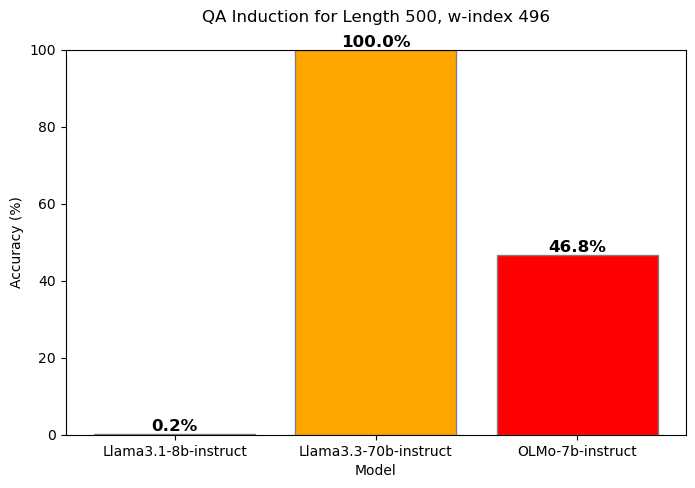

In [132]:
results = {
    'Llama3.1-8b-instruct': llama_8b_acc_ind_qa,
    'Llama3.3-70b-instruct': llama_70b_acc_ind_qa,
    'OLMo-7b-instruct': olmo_7b_acc_ind_qa
}

plt.figure(figsize=(8, 5))
bars = plt.bar(results.keys(), results.values(), color=['green', 'orange', 'red'], edgecolor='grey')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}%', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("QA Induction for Length 500, w-index 496", pad=20)
plt.ylim(0, 100)
plt.show()


# Flip-Flop

In [130]:
llama_8b_flipflop = flatten([
    get_data("flipflop/llama3.1_8B-instruct/sparse/s1/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/sparse/s2/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/sparse/s3/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/sparse/s4/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/sparse/s5/flipflop_500_pw0_results.jsonl")
])

llama_70b_flipflop = flatten([
    get_data("flipflop/llama3.3_70B-instruct/sparse/s1/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/sparse/s2/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/sparse/s3/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/sparse/s4/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/sparse/s5/flipflop_500_pw0_results.jsonl")
])

olmo_7b_flipflop = flatten([
    get_data("flipflop/OLMo_7b-instruct/sparse/s1/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/sparse/s2/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/sparse/s3/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/sparse/s4/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/sparse/s5/flipflop_500_pw0_results.jsonl")
])

In [131]:
llama_8b_acc_flipflop = get_ind_acc(llama_8b_flipflop)
llama_70b_acc_flipflop = get_ind_acc(llama_70b_flipflop)
olmo_7b_acc_flipflop = get_ind_acc(olmo_7b_flipflop)

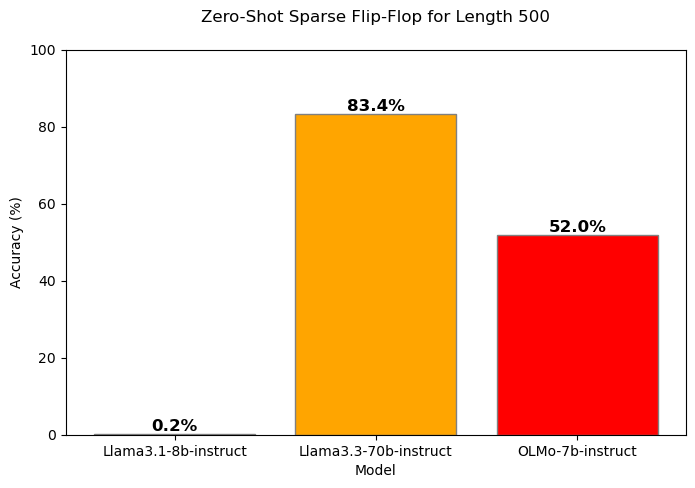

In [133]:
results = {
    'Llama3.1-8b-instruct': llama_8b_acc_flipflop,
    'Llama3.3-70b-instruct': llama_70b_acc_flipflop,
    'OLMo-7b-instruct': olmo_7b_acc_flipflop
}

plt.figure(figsize=(8, 5))
bars = plt.bar(results.keys(), results.values(), color=['green', 'orange', 'red'], edgecolor='grey')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}%', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Zero-Shot Sparse Flip-Flop for Length 500", pad=20)
plt.ylim(0, 100)
plt.show()


In [134]:
llama_8b_flipflop_qa = flatten([
    get_data("flipflop/llama3.1_8B-instruct/sparse-qa/s1/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/sparse-qa/s2/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/sparse-qa/s3/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/sparse-qa/s4/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.1_8B-instruct/sparse-qa/s5/flipflop_500_pw0_results.jsonl")
])

llama_70b_flipflop_qa = flatten([
    get_data("flipflop/llama3.3_70B-instruct/sparse-qa/s1/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/sparse-qa/s2/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/sparse-qa/s3/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/sparse-qa/s4/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/llama3.3_70B-instruct/sparse-qa/s5/flipflop_500_pw0_results.jsonl")
])

olmo_7b_flipflop_qa = flatten([
    get_data("flipflop/OLMo_7b-instruct/sparse-qa/s1/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/sparse-qa/s2/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/sparse-qa/s3/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/sparse-qa/s4/flipflop_500_pw0_results.jsonl"),
    get_data("flipflop/OLMo_7b-instruct/sparse-qa/s5/flipflop_500_pw0_results.jsonl")
])

llama_8b_acc_flipflop_qa = get_ind_acc(llama_8b_flipflop_qa)
llama_70b_acc_flipflop_qa = get_ind_acc(llama_70b_flipflop_qa)
olmo_7b_acc_flipflop_qa = get_ind_acc(olmo_7b_flipflop_qa)

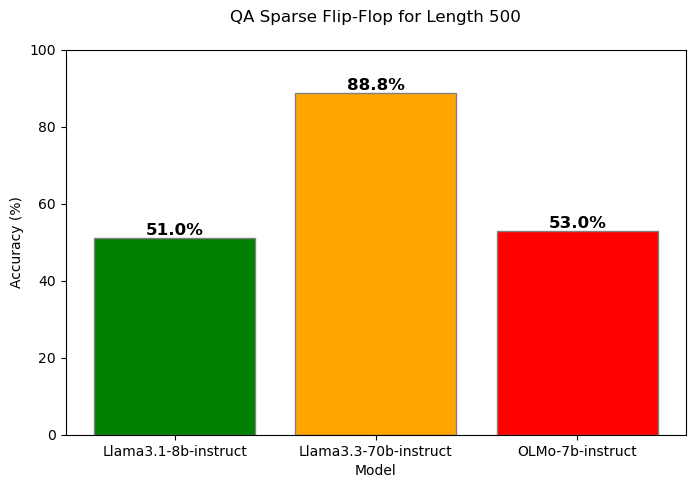

In [135]:
results = {
    'Llama3.1-8b-instruct': llama_8b_acc_flipflop_qa,
    'Llama3.3-70b-instruct': llama_70b_acc_flipflop_qa,
    'OLMo-7b-instruct': olmo_7b_acc_flipflop_qa
}

plt.figure(figsize=(8, 5))
bars = plt.bar(results.keys(), results.values(), color=['green', 'orange', 'red'], edgecolor='grey')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1f}%', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("QA Sparse Flip-Flop for Length 500", pad=20)
plt.ylim(0, 100)
plt.show()
